# SVR Regression

In [ ]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel

In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
import statsmodels.formula.api 
import statsmodels.regression.linear_model as sm

In [5]:
FinDaDr = pd.read_csv('C:/Users/hp/FIN_DATA/Final_Data_Draft.csv')
FinDaDr.head()

,Unnamed: 0,Zone,Year,PRECIP,TMPMAX,TMPMIN,RELHUM,WINDLY,SUNHRS,Irrg_Yes,Irrg_No,Seed_Improved,Seed_Not_Improved,Damage_Yes,Damage_No,Dreason_Crop_disease,Dreason_Frost,Dreason_Floods,Dreason_Locust,Dreason_Insects,Dreason_Toolittle_rain,Dreason_Toomuch_rain,Dreason_Wild_animals,Dreason_Birds,Dreason_Hail,Dreason_Weeds,Dreason_ShortageSeed,Dreason_DepletionSoil,Dreason_Security,Dreason_UseBadCrop,Dmeasure_Yes,Dmeasure_No,Dmtype_Chemical,Dmtype_NonChemical,Dmtype_Both,Dmchem_Insecticide,Dmchem_Herbicide,Dmchem_Fungicide,Dmchem_Insectcide_Her,Dmchem_Insectcide_Fun,Dmchem_Herbicide_Fung,Dmchem_All,Fert_Yes,Fert_No,Ferttype_Natural,Ferttype_Chemical,Ferttype_Both,D22a_Urea,D22a_DAP,D22a_Urea_DAP,D22a_NPS,D22a_Urea_NPS,D22a_Mixed,D23_Manure,D23_Compost,D23_Organic,D23_Manure_Compost,D23_Manure_Organic,D23_Compost_Organic,D23_All,Fweight,Area,Production,Yield,Crop
0,0,1,1997,69.269978,29.656865,14.336538,52.592245,1.698718,12.359170,0.0,72.0,0.0,72.0,22.0,48.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,71.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,50.0,16.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,10983.27,500.000000,1863.00,3.730000,1
1,1,2,1997,57.647542,29.802796,19.996551,45.495155,1.698718,34.862082,14.0,1449.0,6.0,1457.0,880.0,582.0,31.0,7.0,10.0,37.0,223.0,343.0,37.0,8.0,60.0,79.0,9.0,0.0,21.0,0.0,15.0,1430.0,32.0,42.0,1303.0,85.0,20.0,14.0,0.0,4.0,0.0,0.0,0.0,1103.0,360.0,648.0,246.0,196.0,18.0,12.0,408.0,0.0,0.0,0.0,570.0,81.0,0.0,177.0,0.0,0.0,0.0,305751.82,20893.000000,207514.00,9.930000,1
2,2,3,1997,34.947796,24.863651,9.024471,57.551787,7.858578,12.400941,25.0,2474.0,27.0,2472.0,2129.0,370.0,3.0,3.0,4.0,2.0,764.0,1259.0,14.0,12.0,11.0,29.0,6.0,0.0,9.0,0.0,13.0,2465.0,34.0,7.0,2447.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1809.0,690.0,1110.0,401.0,297.0,58.0,128.0,510.0,0.0,0.0,0.0,978.0,255.0,0.0,156.0,0.0,0.0,0.0,348274.08,25691.000000,223088.00,8.680000,1
3,3,4,1997,60.206309,38.878724,26.824670,47.743268,10.645464,18.271932,0.0,74.0,0.0,74.0,1.0,73.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,22.0,43.0,9.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,29.0,10.0,0.0,4.0,0.0,0.0,0.0,6040.31,2414.881429,24166.85,10.007469,1
4,4,1,1998,78.737179,27.805128,18.107981,52.592245,1.575641,11.397638,0.0,72.0,0.0,72.0,22.0,48.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,71.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,50.0,16.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,10983.27,587.580000,5000.41,8.510000,1


In [6]:
X = FinDaDr.iloc[:, 1:62].drop(columns = ['Year']).values
y = FinDaDr.iloc[:, 62].values

In [7]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(FinDaDr, FinDaDr.Production,
                                                    test_size=0.2,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((332, 65), (84, 65))

In [8]:
for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Fweight', 'Area', 'Production', 'Yield']:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# check that test set does not contain null values in the engineered variables
[var for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Seed_Not_Improved', 'Damage_Yes', 'Dmeasure_Yes', 'Dmtype_NonChemical', 'Fert_Yes', 'Fert_No', 'Ferttype_Natural', 'Ferttype_Chemical', 'D23_Manure', 'Fweight', 'Area', 'Production', 'Yield'] if X_test[var].isnull().sum()>0]

[]

In [10]:
# same for train set
[var for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Seed_Not_Improved', 'Damage_Yes', 'Dmeasure_Yes', 'Dmtype_NonChemical', 'Fert_Yes', 'Fert_No', 'Ferttype_Natural', 'Ferttype_Chemical', 'D23_Manure', 'Fweight', 'Area', 'Production', 'Yield'] if X_train[var].isnull().sum()>0]

[]

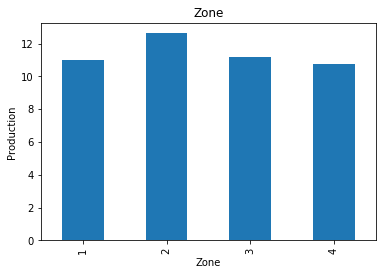

In [11]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['Production'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Production')
    plt.show()
    

analyse_vars(X_train, 'Zone')

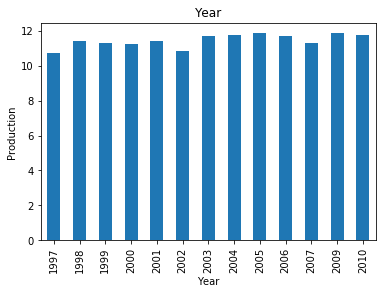

In [12]:
analyse_vars(X_train, 'Year')

In [13]:
X_train.head()

,Unnamed: 0,Zone,Year,PRECIP,TMPMAX,TMPMIN,RELHUM,WINDLY,SUNHRS,Irrg_Yes,Irrg_No,Seed_Improved,Seed_Not_Improved,Damage_Yes,Damage_No,Dreason_Crop_disease,Dreason_Frost,Dreason_Floods,Dreason_Locust,Dreason_Insects,Dreason_Toolittle_rain,Dreason_Toomuch_rain,Dreason_Wild_animals,Dreason_Birds,Dreason_Hail,Dreason_Weeds,Dreason_ShortageSeed,Dreason_DepletionSoil,Dreason_Security,Dreason_UseBadCrop,Dmeasure_Yes,Dmeasure_No,Dmtype_Chemical,Dmtype_NonChemical,Dmtype_Both,Dmchem_Insecticide,Dmchem_Herbicide,Dmchem_Fungicide,Dmchem_Insectcide_Her,Dmchem_Insectcide_Fun,Dmchem_Herbicide_Fung,Dmchem_All,Fert_Yes,Fert_No,Ferttype_Natural,Ferttype_Chemical,Ferttype_Both,D22a_Urea,D22a_DAP,D22a_Urea_DAP,D22a_NPS,D22a_Urea_NPS,D22a_Mixed,D23_Manure,D23_Compost,D23_Organic,D23_Manure_Compost,D23_Manure_Organic,D23_Compost_Organic,D23_All,Fweight,Area,Production,Yield,Crop
20,20,1,2002,4.488449,3.349544,2.723696,3.962569,0.278991,2.095269,0.0,42.0,0.0,42.0,36.0,6.0,0.0,1.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,28.0,12.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,9.473899,6.139101,8.383559,2.244458,1
327,15,4,2000,3.821541,3.748403,3.595942,3.865838,3.368927,3.574232,0.0,14.0,0.0,14.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,7.638367,6.167805,8.192760,2.024956,7
142,38,3,2006,3.917132,3.204707,1.872017,4.042646,1.475482,2.590053,1.0,164.0,1.0,164.0,112.0,53.0,0.0,6.0,0.0,0.0,5.0,98.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,155.0,9.0,0.0,151.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,137.0,28.0,21.0,73.0,43.0,60.0,6.0,49.0,0.0,0.0,0.0,17.0,16.0,1.0,30.0,0.0,0.0,0.0,10.775295,8.306438,10.514483,2.208274,3
14,14,3,2000,4.345823,3.215570,2.254672,4.161492,0.507785,2.113897,15.0,1873.0,3.0,1884.0,1059.0,828.0,25.0,4.0,42.0,0.0,35.0,43.0,658.0,28.0,0.0,33.0,68.0,1.0,89.0,0.0,33.0,1860.0,26.0,12.0,1847.0,1.0,8.0,5.0,6.0,0.0,0.0,0.0,0.0,1400.0,479.0,836.0,419.0,168.0,120.0,150.0,327.0,0.0,0.0,0.0,633.0,197.0,0.0,161.0,1.0,2.0,0.0,13.093088,10.464879,13.003955,2.539237,1
283,23,4,2002,3.794927,3.701000,3.250969,3.865838,2.010425,3.006001,0.0,11.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,7.736115,7.032209,10.189912,3.157702,6


In [14]:
train_vars = [var for var in X_train.columns if var not in ['Crop', 'Year', 'Production']]
len(train_vars)

62

In [15]:
X_train['Production'].reset_index(drop=True)

0       8.383559
1       8.192760
2      10.514483
3      13.003955
4      10.189912
5      11.654079
6       5.055417
7      12.025143
8      11.742491
9      12.889177
10     10.719295
11     11.636559
12      9.844174
13     11.725754
14     11.329208
15     13.782292
16      7.083262
17      9.586414
18     13.218732
19      8.699784
20      8.192760
21     12.208270
22     12.676285
23      8.535722
24      8.399769
25     12.533400
26      8.944811
27      8.399769
28      5.055417
29     12.452257
         ...    
302    12.251673
303    11.788533
304    13.261114
305     9.566555
306    12.666965
307    13.486782
308     9.679519
309     6.286017
310    11.231219
311     8.399769
312    10.092737
313    13.441549
314    10.649678
315     7.852981
316    13.539271
317    11.066939
318    12.126504
319     5.055417
320    11.590306
321    12.831896
322    11.150951
323    12.025024
324     7.930494
325    14.667878
326    11.564210
327     8.340709
328    14.436773
329    12.2299

In [16]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['Production']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['Production']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [17]:
X_train.isnull().sum()

Production                0
Unnamed: 0                0
Zone                      0
PRECIP                    0
TMPMAX                    0
TMPMIN                    0
RELHUM                    0
WINDLY                    0
SUNHRS                    0
Irrg_Yes                  0
Irrg_No                   0
Seed_Improved             0
Seed_Not_Improved         0
Damage_Yes                0
Damage_No                 0
Dreason_Crop_disease      0
Dreason_Frost             0
Dreason_Floods            0
Dreason_Locust            0
Dreason_Insects           0
Dreason_Toolittle_rain    0
Dreason_Toomuch_rain      0
Dreason_Wild_animals      0
Dreason_Birds             0
Dreason_Hail              0
Dreason_Weeds             0
Dreason_ShortageSeed      0
Dreason_DepletionSoil     0
Dreason_Security          0
Dreason_UseBadCrop        0
                         ..
Dmtype_NonChemical        0
Dmtype_Both               0
Dmchem_Insecticide        0
Dmchem_Herbicide          0
Dmchem_Fungicide    

In [18]:
########################################################################################################################

In [19]:
# capture the target
y_train = X_train['Production']
y_test = X_test['Production']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Production'], axis=1, inplace=True)
X_test.drop(['Production'], axis=1, inplace=True)

In [20]:
X_train = X_train.iloc[:, 1:]

In [21]:
X_train.head()

,Zone,PRECIP,TMPMAX,TMPMIN,RELHUM,WINDLY,SUNHRS,Irrg_Yes,Irrg_No,Seed_Improved,Seed_Not_Improved,Damage_Yes,Damage_No,Dreason_Crop_disease,Dreason_Frost,Dreason_Floods,Dreason_Locust,Dreason_Insects,Dreason_Toolittle_rain,Dreason_Toomuch_rain,Dreason_Wild_animals,Dreason_Birds,Dreason_Hail,Dreason_Weeds,Dreason_ShortageSeed,Dreason_DepletionSoil,Dreason_Security,Dreason_UseBadCrop,Dmeasure_Yes,Dmeasure_No,Dmtype_Chemical,Dmtype_NonChemical,Dmtype_Both,Dmchem_Insecticide,Dmchem_Herbicide,Dmchem_Fungicide,Dmchem_Insectcide_Her,Dmchem_Insectcide_Fun,Dmchem_Herbicide_Fung,Dmchem_All,Fert_Yes,Fert_No,Ferttype_Natural,Ferttype_Chemical,Ferttype_Both,D22a_Urea,D22a_DAP,D22a_Urea_DAP,D22a_NPS,D22a_Urea_NPS,D22a_Mixed,D23_Manure,D23_Compost,D23_Organic,D23_Manure_Compost,D23_Manure_Organic,D23_Compost_Organic,D23_All,Fweight,Area,Yield
0,0.000000,0.867912,0.266394,0.501659,0.441609,0.063146,0.044295,0.000000,0.016579,0.000000,0.016592,0.016909,0.004695,0.000000,0.011628,0.000000,0.0,0.000000,0.026211,0.00000,0.000000,0.0,0.005291,0.000000,0.0,0.000000,0.0,0.010989,0.016640,0.000000,0.000000,0.016762,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.007739,0.023589,0.010811,0.001896,0.000000,0.000000,0.003745,0.000863,0.0,0.0,0.0,0.012270,0.003922,0.000000,0.000000,0.000000,0.000000,0.0,0.505580,0.476286,0.232786
1,1.000000,0.341458,1.000000,1.000000,0.170080,0.919825,1.000000,0.000000,0.005257,0.000000,0.005261,0.000939,0.009390,0.000000,0.000000,0.000000,0.0,0.001309,0.000000,0.00152,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.005276,0.000000,0.000000,0.005315,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002211,0.008425,0.003604,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.003067,0.003922,0.000000,0.000000,0.000000,0.000000,0.0,0.270674,0.479201,0.201627
2,0.666667,0.416917,0.000000,0.015069,0.666392,0.394871,0.364024,0.029412,0.065912,0.003268,0.065965,0.052607,0.041471,0.000000,0.069767,0.000000,0.0,0.006545,0.077840,0.00152,0.000000,0.0,0.000000,0.005102,0.0,0.000000,0.0,0.000000,0.062500,0.017308,0.000000,0.061325,0.009324,0.000000,0.002667,0.000000,0.005236,0.0,0.0,0.0,0.075732,0.023589,0.018919,0.069194,0.084813,0.331492,0.022472,0.042278,0.0,0.0,0.0,0.017382,0.062745,0.111111,0.120968,0.000000,0.000000,0.0,0.672128,0.696395,0.227649
3,0.666667,0.755323,0.019981,0.233691,1.000000,0.126579,0.056333,0.441176,0.756975,0.009804,0.762040,0.497417,0.647887,0.128205,0.046512,0.724138,0.0,0.045812,0.034154,1.00000,0.277228,0.0,0.174603,0.346939,0.1,0.773913,0.0,0.362637,0.754464,0.050000,0.061538,0.754702,0.002331,0.036199,0.013333,0.081081,0.000000,0.0,0.0,0.0,0.773908,0.403538,0.753153,0.397156,0.331361,0.662983,0.561798,0.282140,0.0,0.0,0.0,0.647239,0.772549,0.000000,0.649194,0.090909,0.666667,0.0,0.968752,0.915600,0.274630
4,1.000000,0.320449,0.912813,0.802906,0.170080,0.543183,0.632809,0.000000,0.004044,0.000000,0.004047,0.000000,0.008607,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.004058,0.000000,0.000000,0.004088,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002764,0.005055,0.003604,0.000948,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005112,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.283184,0.566988,0.362422


In [22]:
X_test = X_test.iloc[:, 1:]

In [23]:
sel_ = SelectFromModel(LinearRegression()) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [24]:
# this command let's us visualise those features that were kept.
# Kept features have a True indicator
sel_.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False,  True,  True])

In [25]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 61
selected features: 20
features with coefficients shrank to zero: 0


In [26]:
# print the selected features
selected_feat

Index(['Irrg_No', 'Seed_Not_Improved', 'Damage_Yes', 'Dreason_Insects',
       'Dreason_Toolittle_rain', 'Dreason_Toomuch_rain', 'Dmeasure_Yes',
       'Dmtype_NonChemical', 'Dmchem_Fungicide', 'Fert_Yes', 'Fert_No',
       'Ferttype_Natural', 'Ferttype_Chemical', 'Ferttype_Both', 'D22a_DAP',
       'D22a_Urea_DAP', 'D22a_Urea_NPS', 'D23_Manure', 'Area', 'Yield'],
      dtype='object')

In [27]:
# load selected features
# we selected the features in the previous lecture / notebook
# if you haven't done so, go ahead and visit the previous lecture to find out how to select
# the features

features = pd.read_csv('C:/Users/hp/FIN_DATA/selected_featuresDaDrLinReg.csv', header=None)
features = [x for x in features[0]] 

# here I will add this last feature, even though it was not selected in our previous step,
# because it needs key feature engineering steps that I want to discuss further during the deployment
# part of the course. 

features = features + ['Irrg_No'] 

features

['Irrg_No',
 'Seed_Not_Improved',
 'Damage_Yes',
 'Dreason_Insects',
 'Dreason_Toolittle_rain',
 'Dreason_Toomuch_rain',
 'Dmeasure_Yes',
 'Dmtype_NonChemical',
 'Dmchem_Fungicide',
 'Fert_Yes',
 'Fert_No',
 'Ferttype_Natural',
 'Ferttype_Chemical',
 'Ferttype_Both',
 'D22a_DAP',
 'D22a_Urea_DAP',
 'D22a_Urea_NPS',
 'D23_Manure',
 'Area',
 'Yield',
 'Irrg_No']

In [28]:

# reduce the train and test set to the desired features

X_train = X_train[features]
X_test = X_test[features]

In [29]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_test,y_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
# evaluate the model:
# remember that we log transformed the output  in our feature engineering notebook / lecture.

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original agriculture values.

# We will evaluate performance using the mean squared error and the
# root of the mean squared error

pred = regressor.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = regressor.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 14653531038700.9
linear train rmse: 3827993.0823737

linear test mse: 510896210456.50336
linear test rmse: 714770.0402622534

Average house price:  92513.54000000002


In [31]:
y_pred=regressor.predict(X_test)

In [32]:
y_pred

array([10.73482684, 11.02682029, 12.63086118, 10.72318075, 11.10477586,
       10.89653351, 11.21371398, 12.95379808, 12.16432532, 12.52434706,
       10.63744625, 11.4573913 , 10.62027807, 11.16503111, 10.80297325,
       12.04683891, 10.12047553, 12.41344058, 10.74394616, 12.19812394,
       11.05974227, 12.12663803, 10.88288498, 12.32973195, 11.93512759,
       12.93715601, 12.10324697, 11.40602828, 10.61381906, 11.69636662,
       10.8498139 , 11.04826849, 11.14450225, 10.92879195, 10.2268907 ,
       10.67378509, 12.50366789, 11.84178588, 11.01165375, 13.2714588 ,
       10.5863896 , 11.26653475, 12.25366706, 12.12215995, 10.22631122,
       11.45702953, 11.13410641, 10.12056848, 12.04941536, 10.99996806,
       10.48332872, 12.4781624 , 12.53430539, 10.82247837, 12.66054602,
       10.75680251, 10.84219468, 12.55351211, 11.08486655, 13.03061076,
       11.13504356, 12.06770629, 11.77770048, 12.39273838, 11.14257838,
       11.18628371, 11.57719904, 11.17096974, 13.12010064, 12.13

In [33]:
y_test

0      9.417483
1     11.231219
2     15.567218
3      8.468656
4      5.055417
5     10.461939
6     11.145920
7     12.853798
8     12.435808
9     12.269540
10     8.192760
11    10.665465
12     7.852981
13    11.295423
14     9.930703
15    13.339251
16     8.399769
17    13.864953
18     8.590624
19    14.072407
20    11.159742
21    12.658026
22    10.309548
23    10.144078
24    12.398509
25    13.183615
26    14.641851
27    11.673904
28     7.852981
29    11.950863
        ...    
54    14.066703
55     9.473648
56    10.189912
57    13.628057
58    11.082784
59    12.889715
60    11.231219
61    12.601409
62    14.070470
63    13.614987
64    10.824189
65    11.545554
66    11.959552
67    12.601077
68    13.294288
69    12.713769
70    12.332870
71     8.517275
72    13.145655
73     7.954299
74    10.842932
75    11.505647
76    11.752283
77    14.187524
78    13.501894
79    13.914904
80     9.540889
81    12.903378
82    13.261114
83     8.939514
Name: Production, Length

Text(0.5, 1.0, 'Evaluation of SVR Predictions')

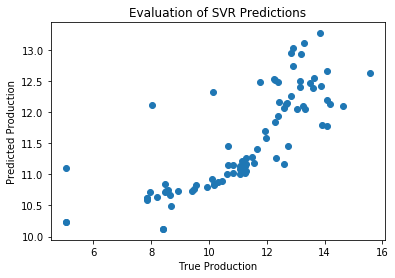

In [34]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, y_pred)
plt.xlabel('True Production')
plt.ylabel('Predicted Production')
plt.title('Evaluation of SVR Predictions')

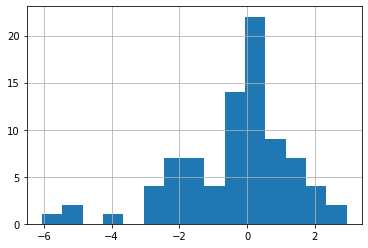

In [40]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - regressor.predict(X_test)
errors.hist(bins=15)